### 15 Minutes to Spark (@andrea.ialenti)

https://towardsdatascience.com/15-minutes-to-spark-89cca49993f0


### Six Spark Exercises to Rule Them All (@andrea.ialenti)

https://towardsdatascience.com/six-spark-exercises-to-rule-them-all-242445b24565


### Dataset:
https://drive.google.com/file/d/1kCXnIeoPT6p9kS_ANJ0mmpxlfDwK1yio/view


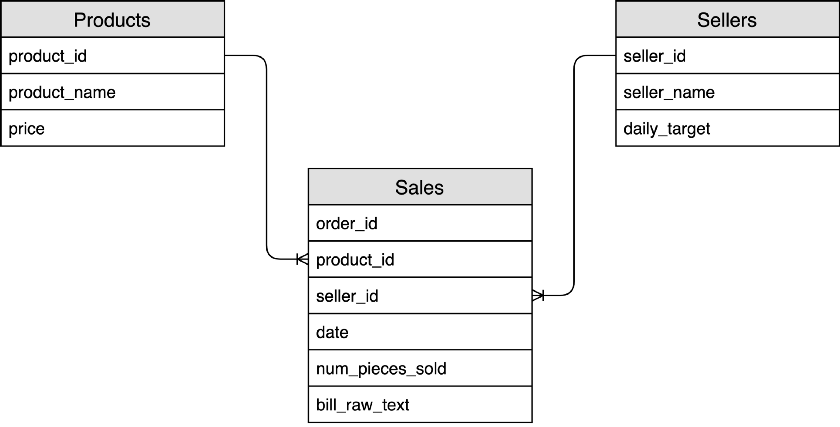


In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [6]:
#   Initialize the Spark session
spark = SparkSession.builder \
    .master("local") \
    .appName("SparkLikeABoss") \
    .getOrCreate()

In [7]:
dataset_path = "/user/aluno/kaue/data/spark-dataset-medium"

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT *
FROM sales_table
'''
#   Execution Plan
sales_table_execution_plan = sales_table.select(col("*"))
#   Show (Action) - Showing 5 rows with no limit in columns width
sales_table_execution_plan.show(5, True)

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT order_id AS the_order_id,
       seller_id AS the_seller_id,
       num_pieces_sold AS the_number_of_pieces_sold
FROM sales_table
'''
#   Execution Plan and show action in one line
sales_table_execution_plan = sales_table.select(
    sales_table["order_id"].alias("the_order_id"),
    sales_table["seller_id"].alias("the_seller_id"),
    sales_table["num_pieces_sold"].alias("the_number_of_pieces_sold")
).show(5, True)

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT order_id,
       product_id,
       seller_id,
       date,
       num_pieces_sold AS pieces,
       bill_raw_text
FROM sales_table a
'''
sales_table_execution_plan = sales_table. \
    withColumnRenamed("num_pieces_sold", "pieces")

sales_table_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT order_id,
       product_id,
       seller_id,
       date,
       num_pieces_sold,
       bill_raw_text,
       num_pieces_sold % 2 AS num_pieces_sold_is_even
FROM sales_table a
'''
sales_table_execution_plan = sales_table. \
    withColumn("num_pieces_sold_is_even", col("num_pieces_sold")%2)

sales_table_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT product_id,
       SUM(num_pieces_sold) AS total_pieces_sold,
       AVG(num_pieces_sold) AS average_pieces_sold,
       MAX(num_pieces_sold) AS max_pieces_sold_of_product_in_orders,
       MIN(num_pieces_sold) AS min_pieces_sold_of_product_in_orders,
       COUNT(num_pieces_sold) AS num_times_product_sold
FROM sales_table
GROUP BY product_id
'''

sales_table_execution_plan = sales_table.groupBy(
    col("product_id")
).agg(
    sum("num_pieces_sold").alias("total_pieces_sold"),
    avg("num_pieces_sold").alias("average_pieces_sold"),
    max("num_pieces_sold").alias("max_pieces_sold_of_product_in_orders"),
    min("num_pieces_sold").alias("min_pieces_sold_of_product_in_orders"),
    count("num_pieces_sold").alias("num_times_product_sold")
)

sales_table_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
-- Create a temporary table with a few renamings
CREATE TABLE temp_1 AS
SELECT seller_id AS the_seller,
       num_pieces_sold AS pieces,
       product_id
FROM sales_table;

-- Do aggregation on the new table
CREATE TABLE temp_2 AS
SELECT product_id,
       SUM(pieces) AS total_pieces
FROM temp_1
GROUP BY product_id;

-- Add a further column
SELECT a.*,
       1 AS fake_column
FROM temp2 a;
'''
sales_table_execution_plan = sales_table. \
    withColumnRenamed("seller_id", "the_seller"). \
    withColumnRenamed("num_pieces_sold", "pieces").\
groupBy(
    col("product_id")
).agg(
    sum("pieces").alias("total_pieces")
).withColumn("fake_column", lit(1))

#   Print Schema
sales_table_execution_plan.printSchema()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT DISTINCT seller_id,
       date
FROM sales_table
'''
sales_table_execution_plan = sales_table.select(
    col("seller_id"), col("date")
).distinct()

#   Print Schema
sales_table_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT seller_id,
       CASE WHEN num_pieces_sold < 30 THEN 'Lower than 30',
            WHEN num_pieces_sold < 60 THEN 'Between 31 and 60'
            WHEN num_pieces_sold < 90 THEN 'Between 61 and 90'
            ELSE 'More than 91' AS sales_bucket
FROM sales_table
'''
sales_table_execution_plan = sales_table.select(
    col("seller_id"),
    when(col("num_pieces_sold") < 30, "Lower than 30").
    when(col("num_pieces_sold") < 60, "Between 31 and 60").
    when(col("num_pieces_sold") < 90, "Between 61 and 90").
    otherwise("More than 91").alias("sales_bucket")
)

sales_table_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
CREATE TABLE part_1 AS
SELECT *
FROM sales_table
WHERE num_pieces_sold > 50;
CREATE TABLE part_2 AS
SELECT *
FROM sales_table
WHERE num_pieces_sold <= 50;
SELECT *
FROM part_1
 UNION ALL
SELECT *
FROM part_2
'''
#   Split part 1
sales_table_execution_plan_part_1 = sales_table.where(col("num_pieces_sold") > 50)

#   Split part 2
sales_table_execution_plan_part_2 = sales_table.where(col("num_pieces_sold") <= 50)

#   Union back
sales_table_execution_plan = sales_table_execution_plan_part_1.unionByName(sales_table_execution_plan_part_2)

sales_table_execution_plan.explain()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")
sellers_table = spark.read.parquet(dataset_path + "/sellers_parquet")

'''
SELECT a.*,
       b.*
FROM sales_table a
    LEFT JOIN sellers_table b
        ON a.seller_id = b.seller_id
'''

#   Left join
left_join_execution_plan = sales_table.join(sellers_table, 
                   on=sales_table["seller_id"] == sellers_table["seller_id"], 
                   how="left")

#   Inner join
inner_join_execution_plan = sales_table.join(sellers_table, 
                   on=sales_table["seller_id"] == sellers_table["seller_id"], 
                   how="inner")

#   Right join
right_join_execution_plan = sales_table.join(sellers_table, 
                   on=sales_table["seller_id"] == sellers_table["seller_id"], 
                   how="right")

#   Full Outer join
full_outer_join_execution_plan = sales_table.join(sellers_table, 
                   on=sales_table["seller_id"] == sellers_table["seller_id"], 
                   how="full_outer")

In [ ]:
left_join_execution_plan.show(2,True)
inner_join_execution_plan.show(2,True)
right_join_execution_plan.show(2,True)
full_outer_join_execution_plan.show(2,True)

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")
sellers_table = spark.read.parquet(dataset_path + "/sellers_parquet")


'''
SELECT *
FROM sales_table
WHERE seller_id IN (SELECT seller_id FROM sellers_table)
'''

#   Left Semi joins are a way to express the IN operation in SQL
semi_join_execution_plan = sales_table.join(sellers_table, 
                on=sales_table["seller_id"] == sellers_table["seller_id"], 
                how="left_semi")

semi_join_execution_plan.show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")
sellers_table = spark.read.parquet(dataset_path + "/sellers_parquet")

'''
SELECT *
FROM sales_table
WHERE seller_id NOT IN (SELECT seller_id FROM sellers_table)
'''
#   Left Anti joins are a way to express the NOT IN operation in SQL
anti_join_execution_plan = sales_table.join(sellers_table,
                on=sales_table["seller_id"] == sellers_table["seller_id"],
                how="left_anti")

anti_join_execution_plan.show()

In [ ]:
#   Import Window
from pyspark.sql.window import Window

#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")
sellers_table = spark.read.parquet(dataset_path + "/sellers_parquet")


'''
SELECT seller_id,
       product_id,
       total_pieces,
       dense_rank() OVER (PARTITION BY seller_id ORDER BY total_pieces DESC) as rank
FROM (
    SELECT seller_id,
           product_id,
           SUM(total_pieces_sold) AS total_pieces
    FROM sales_table
    GROUP BY seller_id,
           product_id
)
'''

sales_table_agg = sales_table.groupBy(col("seller_id"), col("product_id")).agg(sum("num_pieces_sold").alias("total_pieces"))

#   Define the Window: partition the table on the seller ID and sort 
#   each group according to the total pieces sold
window_specifications = Window.partitionBy(col("seller_id")).orderBy(col("total_pieces").asc())

#   Apply the dense_rank function, creating the window according to the specs above
sales_table_agg.withColumn('dense_rank', dense_rank().over(window_specifications)).show()

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path + "/sales_parquet")

'''
SELECT *
WHERE bill_raw_text LIKE 'ab%cd%'
'''
sales_table_execution_plan = sales_table.where(
    col('bill_raw_text').like("abp%cd%")
)

sales_table_execution_plan.show()

### Like with Regular Expressions (Regex)

(ab[cd]{2,4})|(aa[abcde]{1,2})



In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path+"/sales_parquet")

'''
SELECT *
FROM sales_table
WHERE bill_raw_text RLIKE '(ab[cd]{2,4})|(aa[abcde]{1,2})'
'''
sales_table_execution_plan = sales_table.where(
    col('bill_raw_text').rlike("(ab[cd]{2,4})|(aa[abcde]{1,2})")
)

sales_table_execution_plan.show()

### Extracting Pattern with Regular Expressions

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path+"/sales_parquet")

'''
SELECT DISTINCT REGEXP_EXTRACT(bill_raw_text, '(ab[cd]{2,4})|(aa[abcde]{1,2})') AS extracted_pattern
WHERE REGEXP_EXTRACT(bill_raw_text, '(ab[cd]{2,4})|(aa[abcde]{1,2})') <> "
FROM sales_table
'''
sales_table_execution_plan = sales_table.select(
    #   The last integer indicates which group to extract
    regexp_extract(col('bill_raw_text'), "(ab[cd]{2,4})|(aa[abcde]{1,2})", 0).alias("extracted_pattern")
).where(col("extracted_pattern") != "").distinct()

sales_table_execution_plan.show(100,False)

### Array Aggregation

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path+"/sales_parquet")

'''
SELECT COLLECT_SET(num_pieces_sold) AS num_pieces_sold_set,
       COLLECT_LIST(num_pieces_list) AS num_pieces_sold_list,
       seller_id
FROM sales_table
GROUP BY seller_id
'''

sales_table_execution_plan = sales_table.groupBy(col("seller_id")).agg(
    collect_set(col("num_pieces_sold")).alias("num_pieces_sold_set"),
    collect_list(col("num_pieces_sold")).alias("num_pieces_sold_list"),

)

sales_table_execution_plan.show(10, True)

### Exploding an Array

In [ ]:
#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path+"/sales_parquet")

'''
CREATE TABLE sales_table_aggregated AS
SELECT COLLECT_SET(num_pieces_sold) AS num_pieces_sold_set,
       seller_id
FROM sales_table
GROUP BY seller_id;
SELECT EXPLODE(num_pieces_sold_set) AS exploded_num_pieces_set
FROM sales_table_aggregated;
'''
sales_table_execution_aggregated = sales_table.groupBy(col("seller_id")).agg(
    collect_set(col("num_pieces_sold")).alias("num_pieces_sold_set")
)

sales_table_execution_exploded = sales_table_execution_aggregated.select(
    explode(col("num_pieces_sold_set")).alias("exploded_num_pieces_set")
)

sales_table_execution_exploded.show(10, True)

### Other Operations with Arrays (since Spark 2.4)

array_except(array1, array2) — Returns an array of the elements in array1 but not in array2, without duplicates.

array_intersect(array1, array2) — Returns an array of the elements in the intersection of array1 and array2, without duplicates.

array_join(array, delimiter[, nullReplacement]) — Concatenates the elements of the given array using the delimiter and an optional string to replace nulls. If no value is set for nullReplacement, any null value is filtered.

array_max(array) — Returns the maximum value in the array. NULL elements are skipped.

array_min(array) — Returns the minimum value in the array. NULL elements are skipped.

array_sort(array) — Sorts the input array in ascending order. The elements of the input array must be sortable. NULL elements will be placed at the end of the returned array.

### UDFs

In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

#   Create the function that will be used in the UDF
def array_repeat_custom(element, count):
  list = ["{}".format(element) for x in range(0, count)]
  return list

#   Convert the function into a UDF. It's good practice to indicate the return type of the UDF
#   In this case the return type is an array of strings
array_repeat_custom_udf = udf(array_repeat_custom,  ArrayType(StringType()))

#   Read the source tables in Parquet format
sales_table = spark.read.parquet(dataset_path+"/sales_parquet")

#   Call the UDF. 
#   Note the `lit(3)` syntax to declare how many times to repeat the array element:
#   Our UDF only accepts columns as input. The `lit` operator 
#   is very useful in Spark to convert a constant into a "spark column"
sales_table_execution_plan = sales_table.select(
    array_repeat_custom_udf(col("num_pieces_sold"), lit(3)).alias("sample_array")
)

sales_table_execution_plan.show()

+------------+
|sample_array|
+------------+
|[26, 26, 26]|
|[13, 13, 13]|
|[38, 38, 38]|
|[56, 56, 56]|
|[11, 11, 11]|
|[82, 82, 82]|
|[15, 15, 15]|
|[79, 79, 79]|
|[25, 25, 25]|
|   [8, 8, 8]|
|[10, 10, 10]|
|[45, 45, 45]|
|[63, 63, 63]|
|[22, 22, 22]|
|[75, 75, 75]|
|[83, 83, 83]|
|[54, 54, 54]|
|[58, 58, 58]|
|[33, 33, 33]|
|[73, 73, 73]|
+------------+
only showing top 20 rows

